<a href="https://colab.research.google.com/github/RakeshRamagiri13/Diwali_Retail_insights/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Diwali Sales Data.csv to Diwali Sales Data (1).csv


In [ ]:
DataFrame=pd.read_csv('Diwali Sales Data (1).csv',encoding='latin1')

In [ ]:
DataFrame.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
DataFrame.shape

(11251, 13)

In [ ]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


-Here We Drop Blank Columns


In [ ]:
pd.isnull(DataFrame).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df=DataFrame.dropna()

In [ ]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


-Here We Removed Null Values.


In [ ]:
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtypes

/tmp/ipython-input-295054898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount']=df['Amount'].astype('int')


dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#Rename The Columns
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
#By The Describe Function We Known That Discription of Our Data In DataFrame(Mean,Median,Std,Min,Max,etc..)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

/tmp/ipython-input-1231992369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Gender',data=df,palette={'F':'skyblue','M':'orange'})


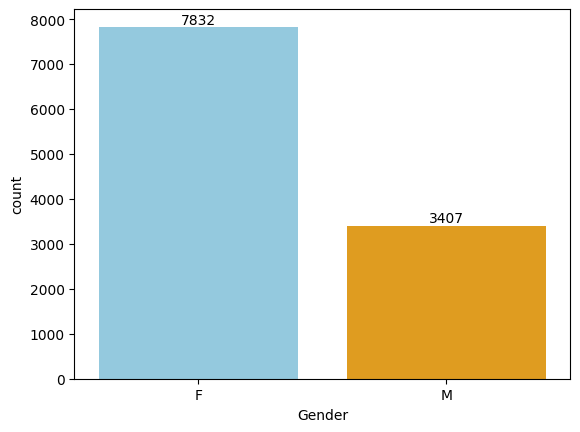

In [ ]:
#Gender
#Here Ploting a BarChart For Gender And Their Count..

ax=sns.countplot(x='Gender',data=df,palette={'F':'skyblue','M':'orange'})
for bars in ax.containers:
  ax.bar_label(bars)



/tmp/ipython-input-175280310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette={'F':'skyblue','M':'orange'})


<Axes: xlabel='Gender', ylabel='Amount'>

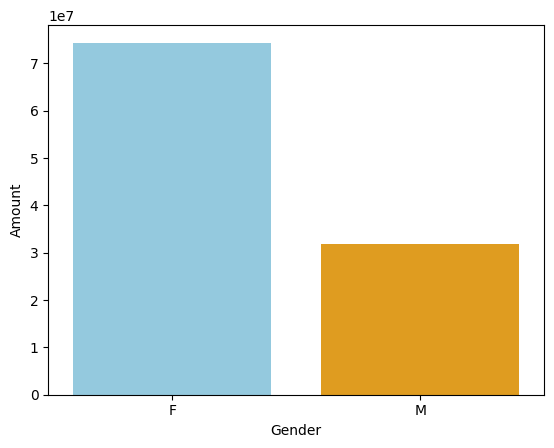

In [ ]:
#Here We Plotting Bar Chart To Know Gender vs Total Amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette={'F':'skyblue','M':'orange'})

##From The Above Graphs We Known That Most Of The Buyers Are Females.
##Even The Purchasing Power Females Are Also High Compare Than Men.


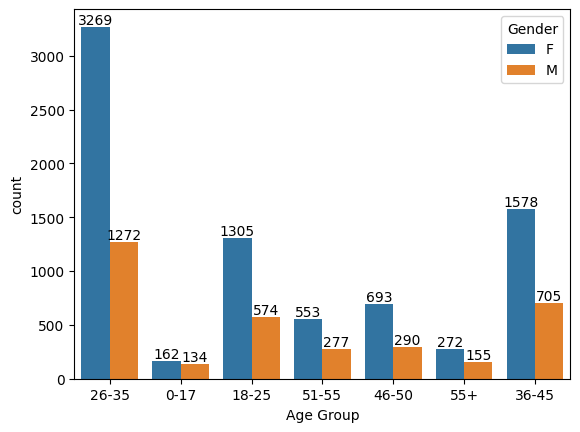

In [ ]:
#Age
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

/tmp/ipython-input-634121077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sales_by_age,palette='rainbow')


<Axes: xlabel='Age Group', ylabel='Amount'>

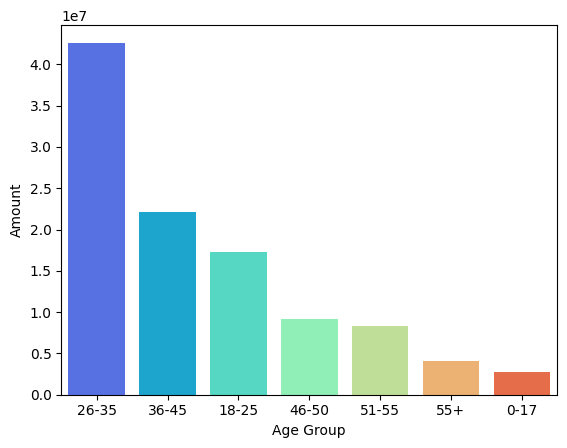

In [ ]:
#Here We Plot Bar Chart To Known Total Amount By Age Group
sales_by_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_by_age,palette='rainbow')

## From the Above Graphs We Observed That Most Of The Buyers Are From Age Group Between (26-35) yrs Females.



/tmp/ipython-input-3879474657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_state,x='State',y='Orders',palette='rainbow')


<Axes: xlabel='State', ylabel='Orders'>

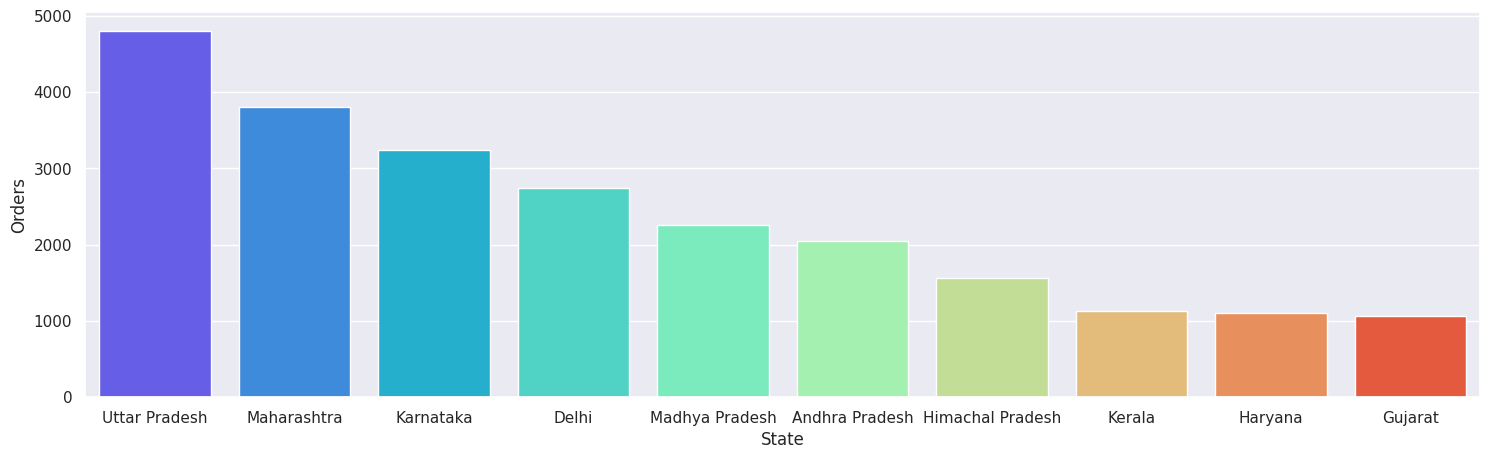

In [ ]:
#State
#Here We Plot BarCharts For Total Number Of Orders From Top 10 States.
sales_by_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_by_state,x='State',y='Orders',palette='rainbow')

/tmp/ipython-input-653640102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_state,x="State",y='Amount',palette='rainbow')


<Axes: xlabel='State', ylabel='Amount'>

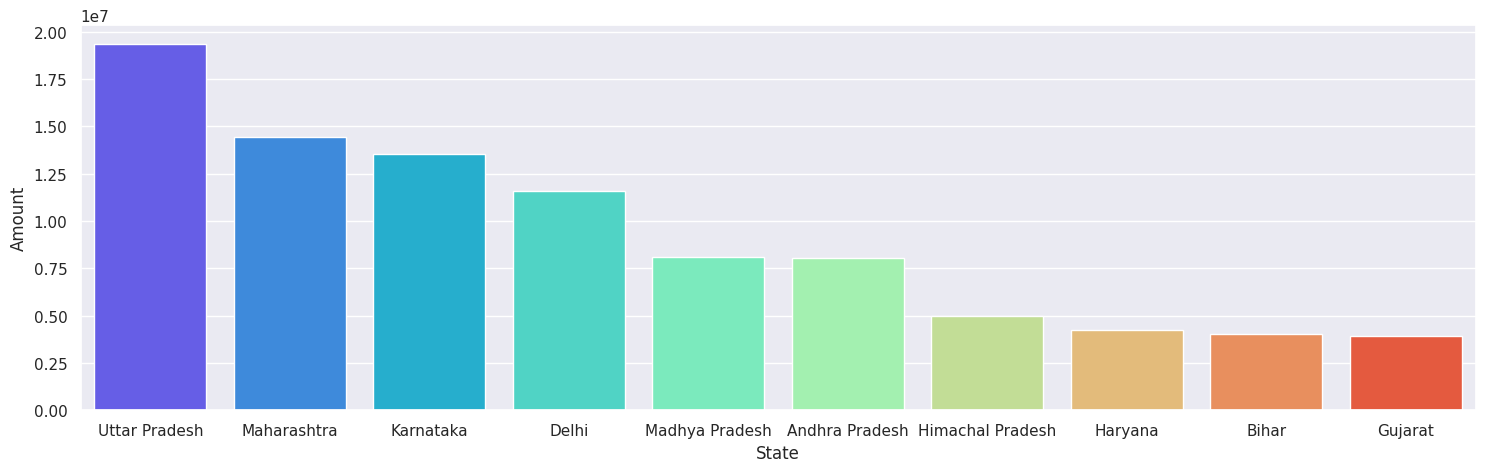

In [ ]:
# Here we Can Plot Chart For Total Amount And sales By Top 10 States

sales_by_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_by_state,x="State",y='Amount',palette='rainbow')

# From The Above Graphs We Observed That Most Of Orders From UttarPradesh,Maharashtra And Karnataka.
# Most Of Total Sales By Amount Also These 3 States Respetively


/tmp/ipython-input-3650280774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status',palette='rainbow')


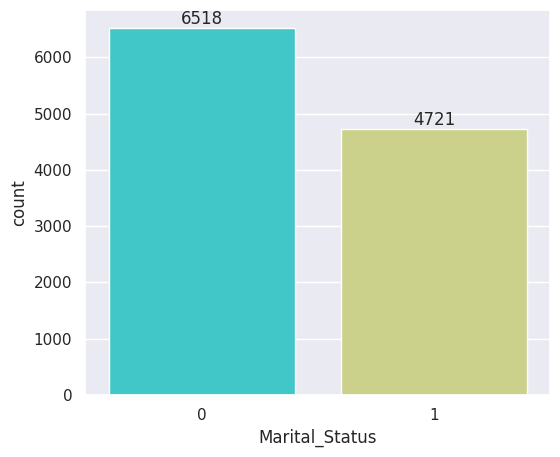

In [ ]:
# Marital Status
ax = sns.countplot(data = df, x = 'Marital_Status',palette='rainbow')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

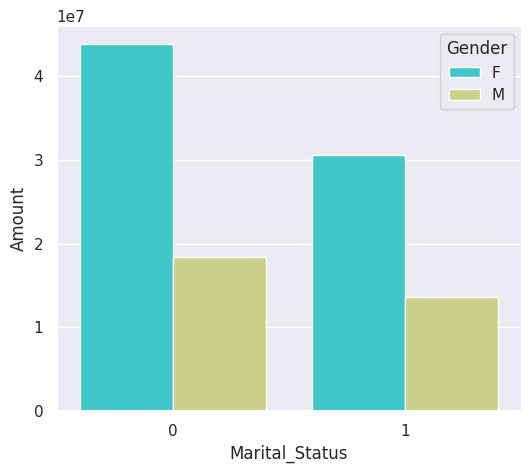

In [ ]:
# Here We Plot The Chart For Total Amount By Marital(Shaadi)Status By Top 5 States
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette='rainbow')

# From The Above Graphs We Observed That Most Of Buyers Are Married Women And They Have High Purchasing Power.


/tmp/ipython-input-4165241667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Occupation',palette='rainbow')


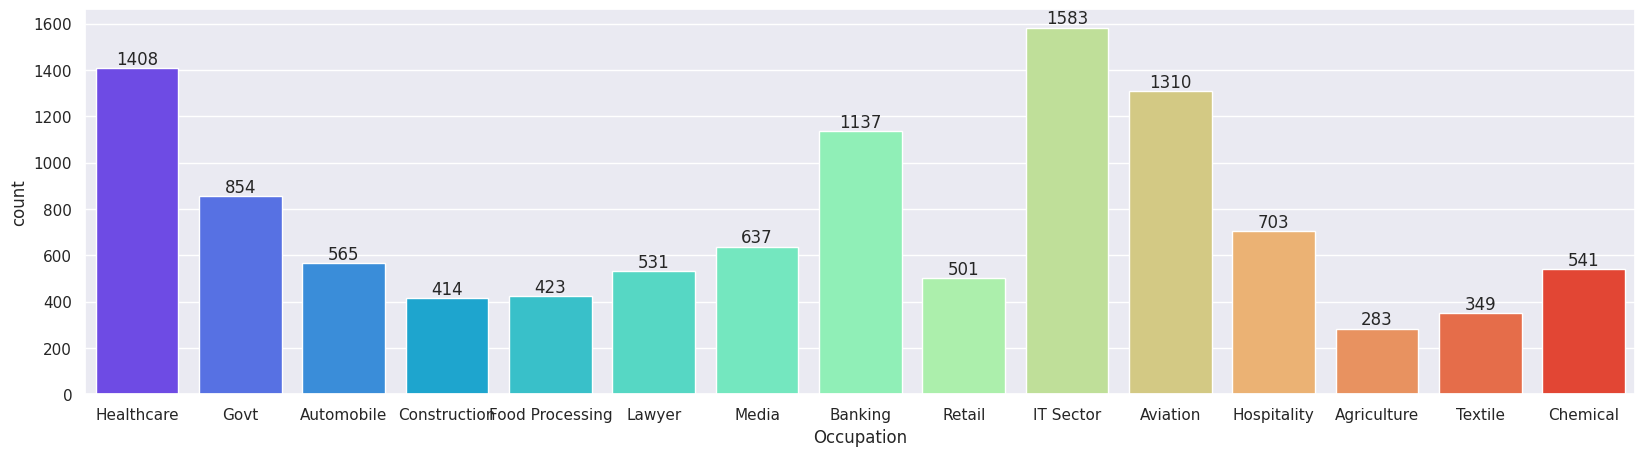

In [ ]:
# Occupation
# Here We Plot The Chart TO Known The Count Of Occpation
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation',palette='rainbow')
for bars in ax.containers:
  ax.bar_label(bars)

/tmp/ipython-input-42695900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='rainbow')


<Axes: xlabel='Occupation', ylabel='Amount'>

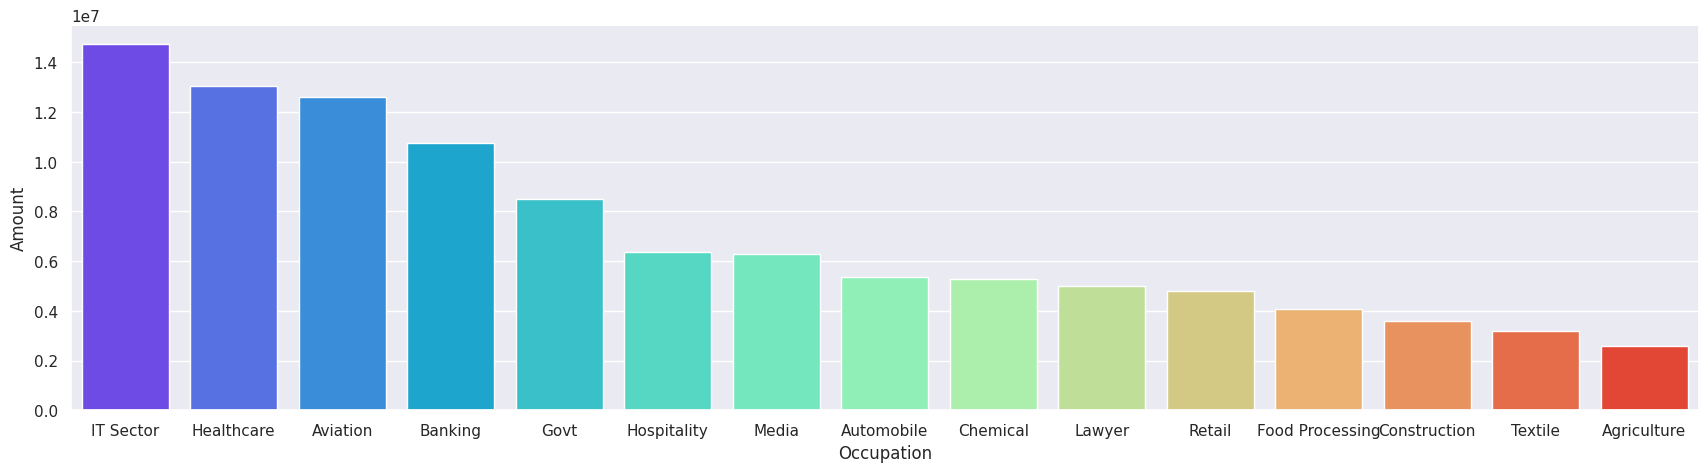

In [ ]:
# Here We Plot The Chart For top Occupations By Amount  And their Working
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='rainbow')

# From The Above Graphs We Can Observe That Most Of The Buyers Are Working In IT,Health Care And Aviation.

/tmp/ipython-input-3610064289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Product_Category',palette='rainbow')


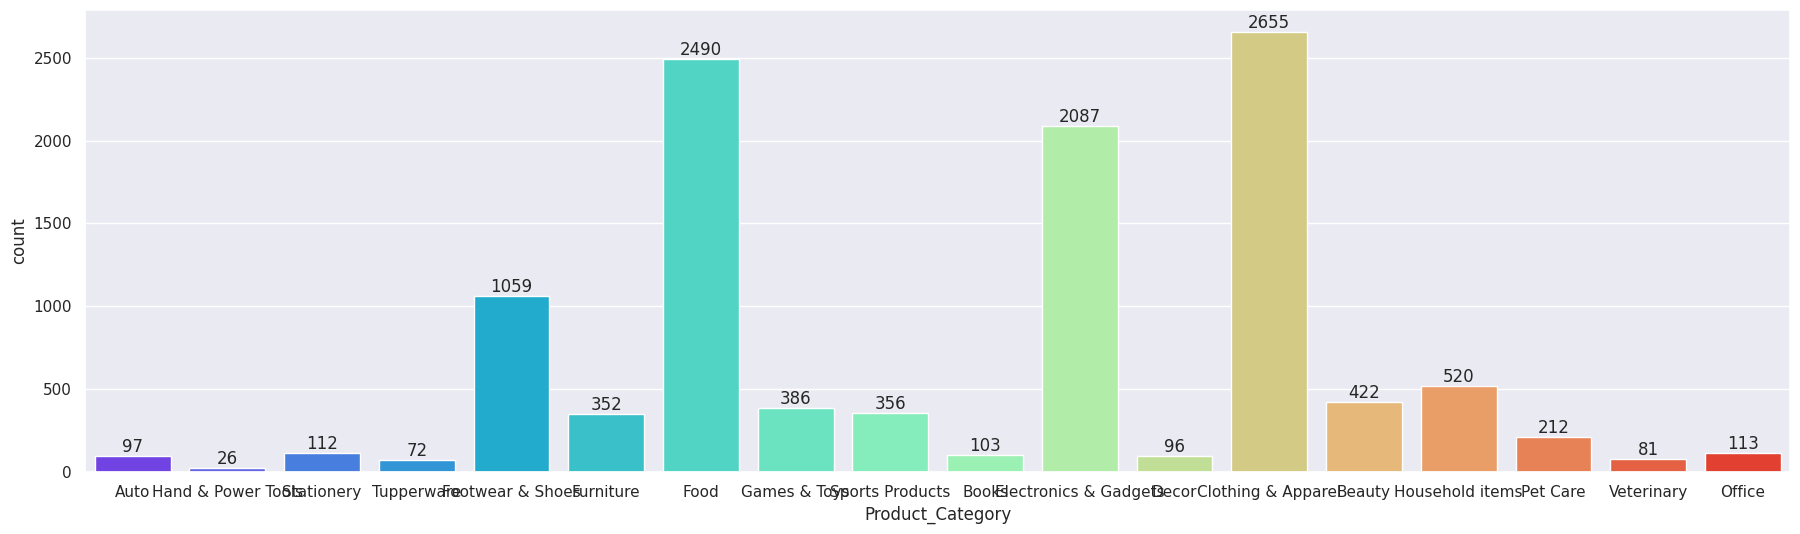

In [ ]:
# Product category
# Here We Plot The Chart For Known The Actual Count Of Product_category
sns.set(rc={'figure.figsize':(22,6)})
ax=sns.countplot(data=df,x='Product_Category',palette='rainbow')
for bars in ax.containers:
  ax.bar_label(bars)

/tmp/ipython-input-4129541699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='rainbow')


<Axes: xlabel='Product_Category', ylabel='Amount'>

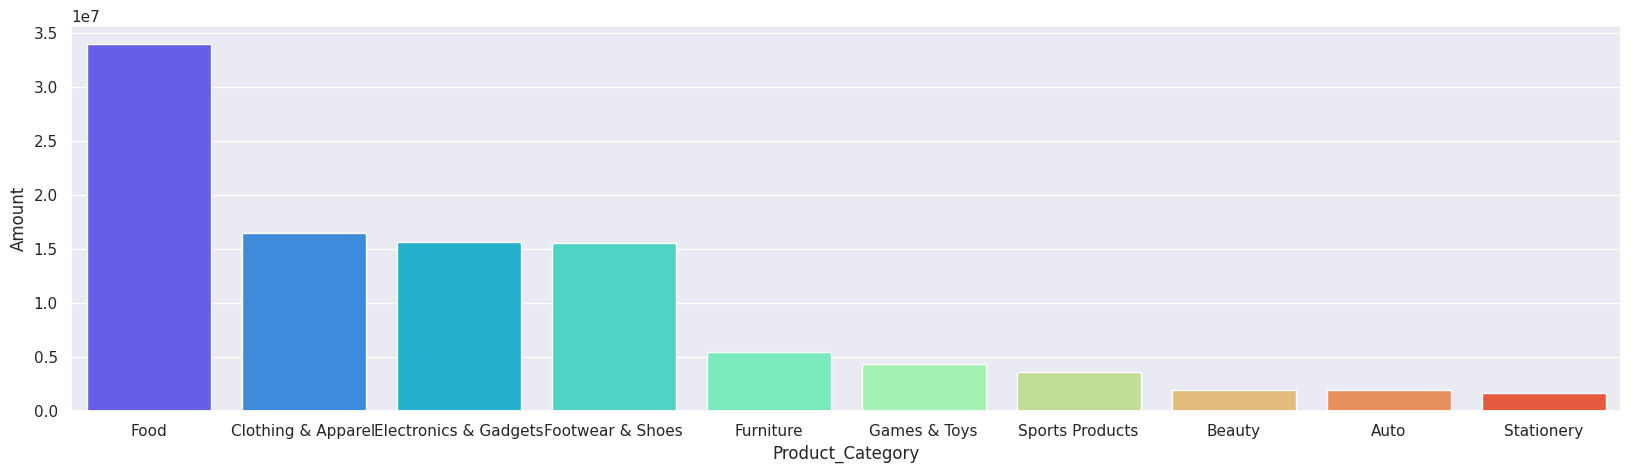

In [ ]:
# Here We Plot the Chart to Known Top 10 Product_Category By Amount
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='rainbow')

# From The Above Graphs We Observe That Food,Clothing,And Electronics are mostly Sold Products


/tmp/ipython-input-205641562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='rainbow')


<Axes: xlabel='Product_ID', ylabel='Orders'>

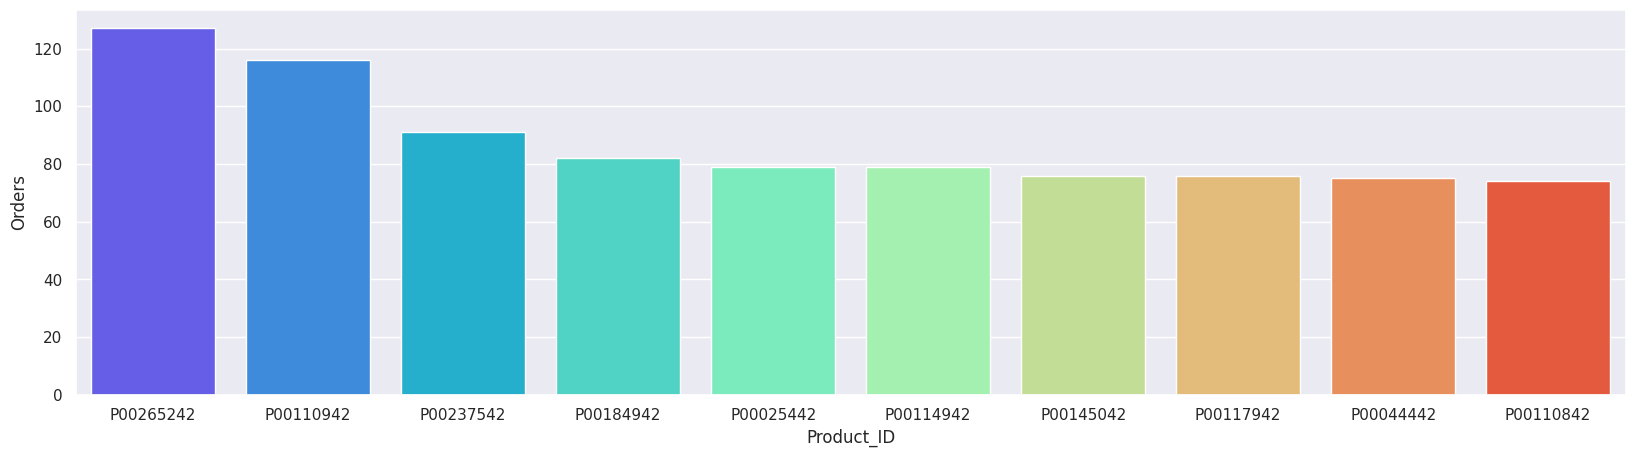

In [ ]:
#Here We Plot the Chart for  top 10 Orders By Product ID's
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='rainbow')


<Axes: xlabel='Product_ID'>

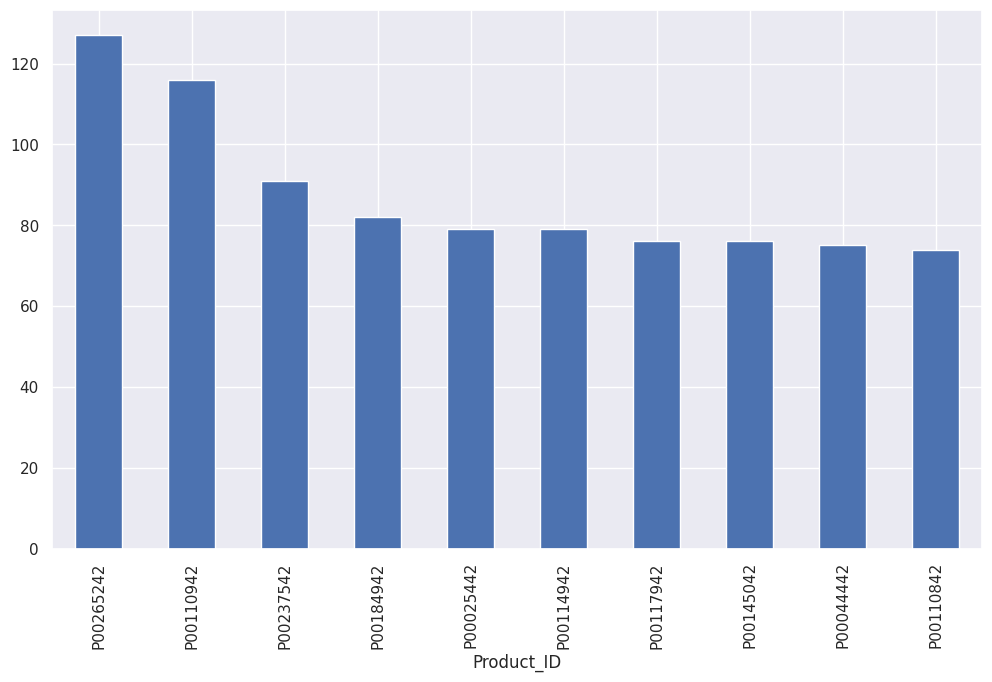

In [ ]:
# Here We Plot the Chart For Top 10 Most Sold Products Same as Above

fig1,ax=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')